In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [201]:
sns.set(rc={"figure.figsize": (12,8), "axes.facecolor": "#e5e4e2", "figure.facecolor": "d3d3d3"}, style="darkgrid",
        palette="muted", context="talk", )

# Loading in our Data

In [4]:
first_year = pd.read_json("Data/tmdb_api_results2000.json")
second_year = pd.read_json("Data/tmdb_api_results2001.json")

## Concatenating our Data frames

In [44]:
final_df = pd.concat([first_year, second_year], axis=0)

In [51]:
print(f"first year results: {len(first_year)}")
print(f"second year results: {len(second_year)}")
print(f"concatenated results: {len(final_df)}")

first year results: 1197
second year results: 1278
concatenated results: 2475


In [52]:
final_df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,None,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,
2,tt0113092,0.0,None,None,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,
3,tt0116391,0.0,None,None,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,None,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1865.0,PG


# Movies with financial data

In [53]:
budget_filter = final_df["budget"] > 0
revenue_filter = final_df["revenue"] > 0

In [57]:
final_df = final_df.loc[budget_filter & revenue_filter, :]

In [61]:
print(f"Movies with financial information {len(final_df)}")

Movies with financial information 346


# Movies per Category

In [73]:
cert = final_df["certification"]

In [86]:
final_df = final_df.loc[(cert == "G") | (cert == "PG") | (cert == "PG-13") | (cert == "R"), :]

In [89]:
final_df["certification"].value_counts()

R        138
PG-13    117
PG        29
G         13
Name: certification, dtype: int64

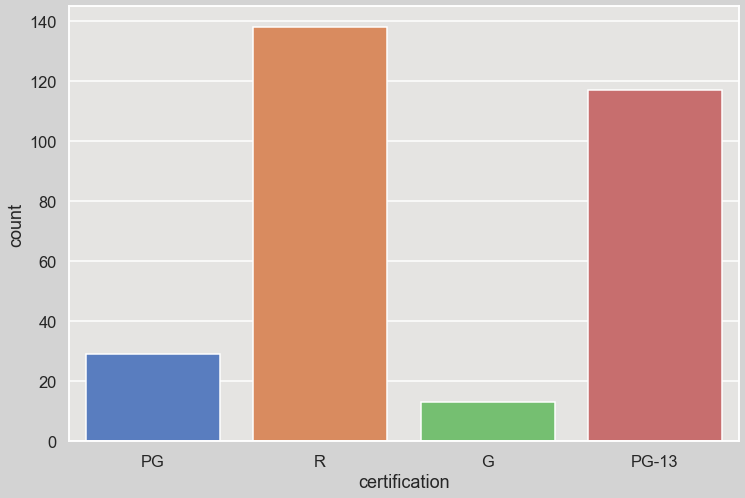

In [202]:
sns.countplot(data=final_df, x="certification");

# Average Revenue per Certification

In [125]:
means_cert_df = final_df.groupby("certification")["revenue"].mean().reset_index()

Text(0.5, 1.0, 'In the 100 Millions')

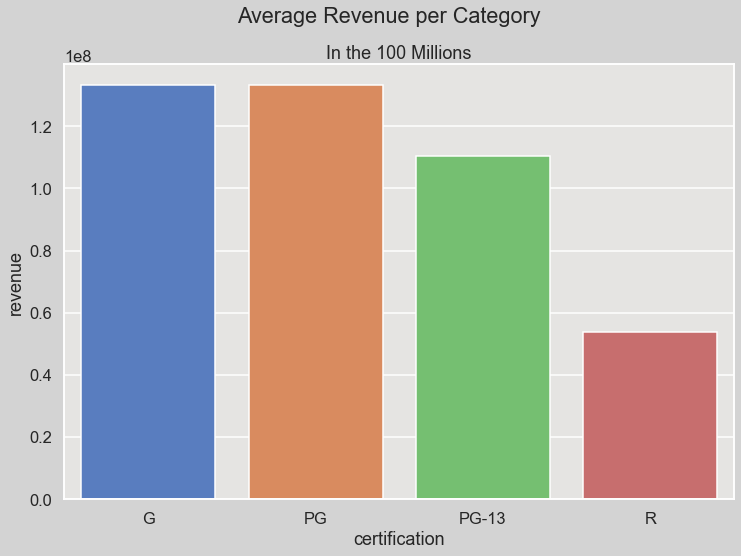

In [215]:
sns.barplot(data=means_cert_df, x="certification", y="revenue")
plt.ticklabel_format(style="sci", axis="y")
plt.suptitle("Average Revenue per Category");
plt.title("In the 100 Millions")

# Average Budget per Certification

In [172]:
means_budget = final_df.groupby("certification")["budget"].mean().reset_index()

Text(0.5, 1.0, 'In the 10 millions')

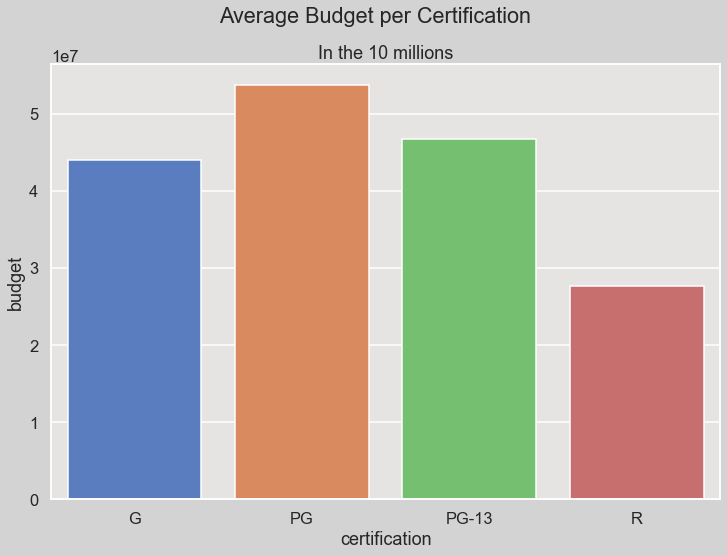

In [214]:
sns.barplot(data=means_budget, x="certification", y="budget")
plt.ticklabel_format(style="sci", axis="y")
plt.suptitle("Average Budget per Certification")
plt.title("In the 10 millions")

# Deliverables

In [219]:
final_df.to_csv("Data/tmdb_results_combined_2000-2001.csv.gz", compression="gzip", index=False)